# Assignment 5 - Feb 5th, 2018

In this notebook, bootstrap sampling is applied to the auto price data. 

# Loading & Cleaning Data

In [4]:
getwd()
# Change the working directory 
setwd("/Users/duygusonmez/Desktop/DataScience410/Lecture1/")

# Read the csv file
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()
str(auto.price)

[1] "/Users/duygusonmez/Desktop/DataScience410/Lecture5"

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

## 1. Compare the difference of the bootstrap resampled mean of the log price of autos grouped by fuel type

### Numerical methods 

In [5]:
table(auto.price$fuel.type)


diesel    gas 
    20    175 

In [6]:
autos.gas <- auto.price[auto.price$fuel.type == 'gas',]
autos.diesel <- auto.price[auto.price$fuel.type == 'diesel',]
autos.gas.log.prices <- log(autos.gas$price)
autos.diesel.log.prices <- log(autos.diesel$price)

Start with creating the plotting function. 

In [7]:
plot.dists <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 20){
  dat = c(a,b)
  maxs = max(dat, na.rm = TRUE)
  mins = min(dat, na.rm = TRUE)
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  par(mfrow = c(2, 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols[1]), xlab = cols[1])
  abline(v = mean(a), lwd = 4, col = 'red')
  hist(b, breaks = breaks, main = paste('Histogram of', cols[2]), xlab = cols[2])
  abline(v = mean(b), lwd = 4, col = 'red')
  par(mfrow = c(1, 1))
}

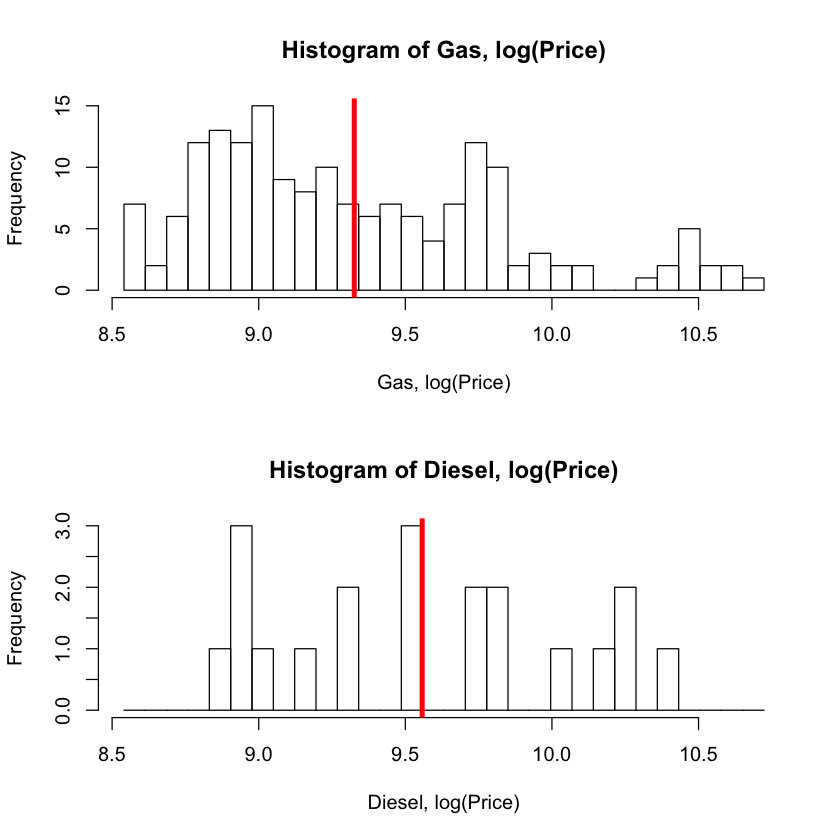

In [8]:
plot.dists(autos.gas.log.prices, autos.diesel.log.prices, cols = c('Gas, log(Price)', 'Diesel, log(Price)'), nbins = 30)

You can see the histograms of gas and diesel overlap while the histogram of prices of gas autos have a wider distribution. Also, means are fairly close to each other. 

### Bootstrap the means

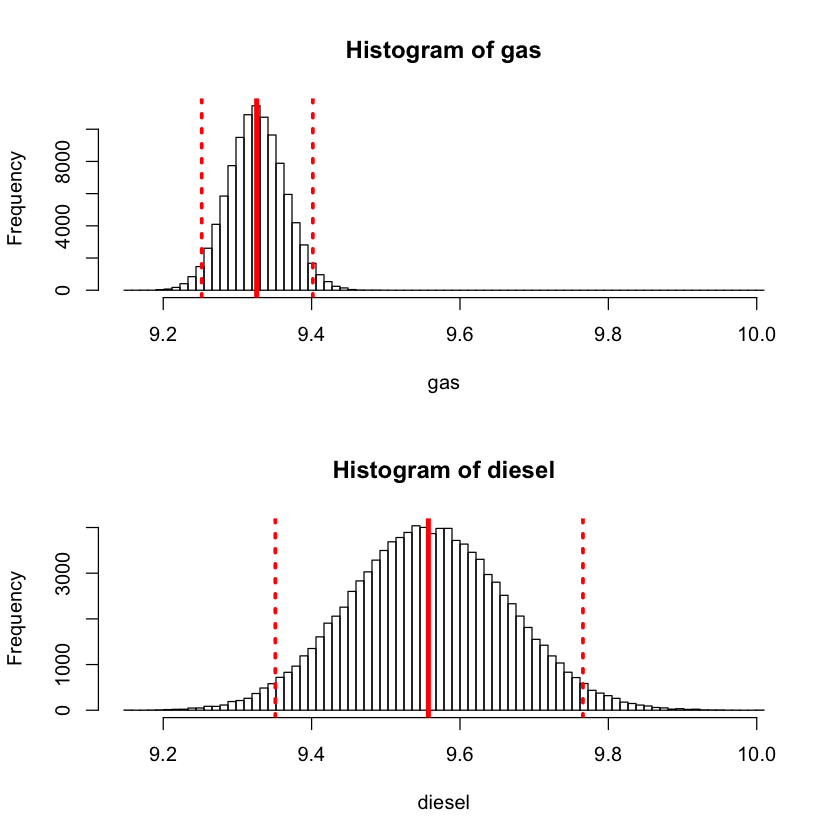

In [14]:
library(HistData)
library(resample)
library(simpleboot)

plot.hist <- function(a, maxs, mins, cols = 'difference of means', nbins = 80, p = 0.05) {
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, main = paste('Histogram of', cols), xlab = cols)
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, p = 0.05){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1])
  plot.hist(b, maxs, mins, cols = cols[2])
  par(mfrow = c(1, 1))
}

## Bootstrap the mean of the gas and of diesel
mean.boot.gas = one.boot(autos.gas.log.prices, mean, R = 100000)
mean.boot.diesel = one.boot(autos.diesel.log.prices, mean, R = 100000)
plot.t(mean.boot.gas$t, mean.boot.diesel$t, cols = c('gas', 'diesel'), nbins = 80)

The distribution of the bootstrap means overlap for a small range. Evidently, there is a slight difference. Diesel autos have a larger range of prices while gas autos have a more narrow range of prices. You can see diesel autos offer more expensive options, but you can find a diesel auto with the same price of a gas auto. 

### Bootstrap the difference in mean

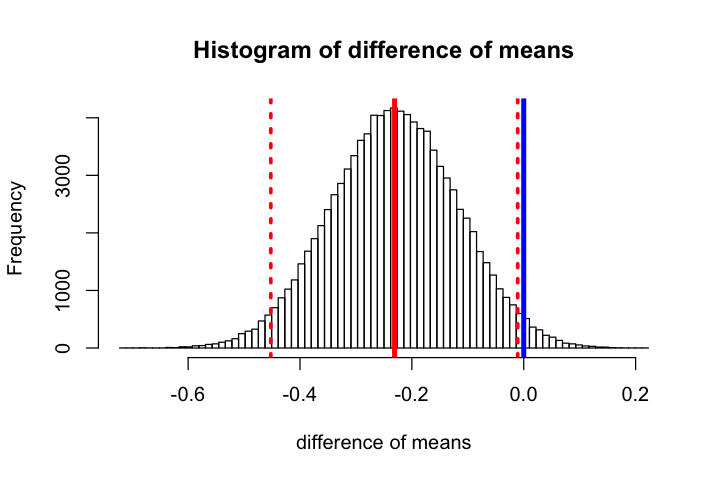

In [31]:
## Bootstrap the difference in means of gas and diesel
plot.diff <- function(a, cols = 'difference of means', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1])
}

require(repr)
options(repr.plot.width=6, repr.plot.height=4)

two.boot.mean.fuel = two.boot(autos.gas.log.prices, autos.diesel.log.prices, mean, R = 100000)
plot.diff(two.boot.mean.fuel$t)

### Graphical methods 

Now, Q-Q plotting of the bootstrap distribution of the difference in means is performed to see if it has a Normal distribution. 

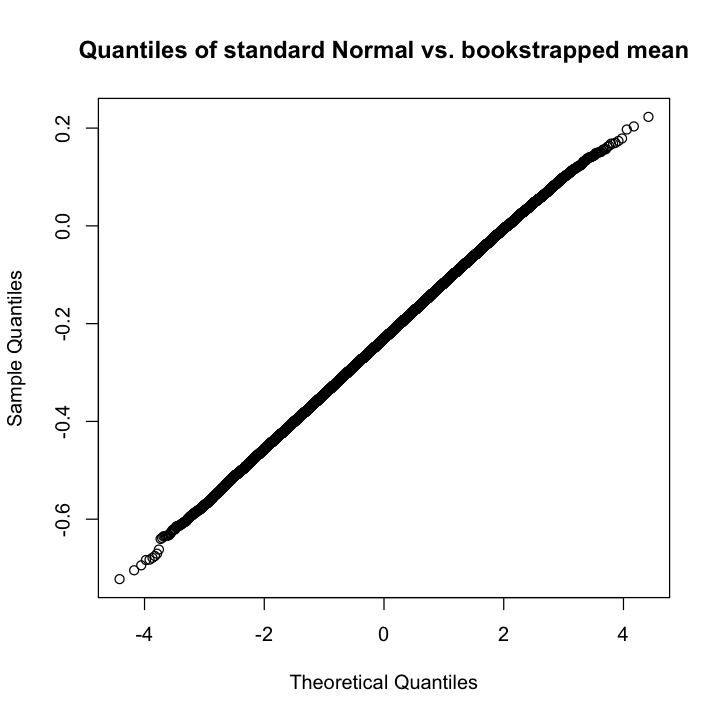

In [32]:
## Is the bootstrapped distribution Normal?
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(two.boot.mean.fuel$t, main = 'Quantiles of standard Normal vs. bookstrapped mean')

The points on the Q-Q plot are nearly on a strait line. Apparently, the bootstrap distribution of the difference in means has a normal distribution which conforms to the Central Limit Theorem.

### Comparison with the results of t-test from last week's assignment

* Histograms appear to have significant overlap in t-test, and means are fairly close to each other. Also, histograms of log(Price) gas and diesel overlap. 
* However when I applied bootstrap sampling and plotted the means for gas and diesel, I found out that diesel autos have a larger range of prices while gas autos have a more narrow range of prices. 

## Compare the difference of the bootstrap resampled mean of the log price of autos grouped by aspiration

### Numerical methods

In [19]:
table(auto.price$aspiration)


  std turbo 
  159    36 

In [23]:
autos.std <- auto.price[auto.price$aspiration == 'std',]
autos.turbo <- auto.price[auto.price$aspiration == 'turbo',] 
autos.std.log.prices <- log(autos.std$price)
autos.turbo.log.prices <- log(autos.turbo$price)

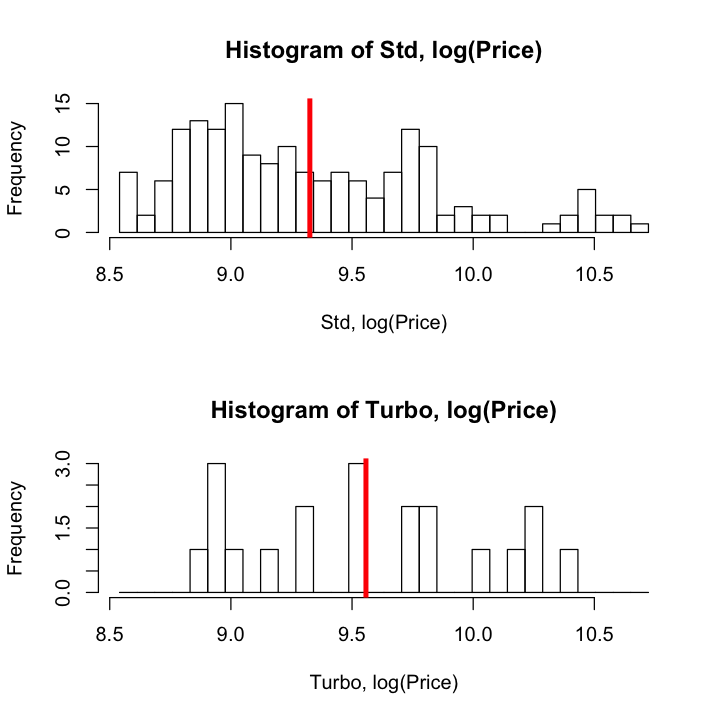

In [24]:
plot.dists(autos.gas.log.prices, autos.diesel.log.prices, cols = c('Std, log(Price)', 'Turbo, log(Price)'), nbins = 30)

You can see the histograms of std and turbo overlap while the histogram of prices of std autos have a wider distribution. But, there is a remarkable difference in means. 

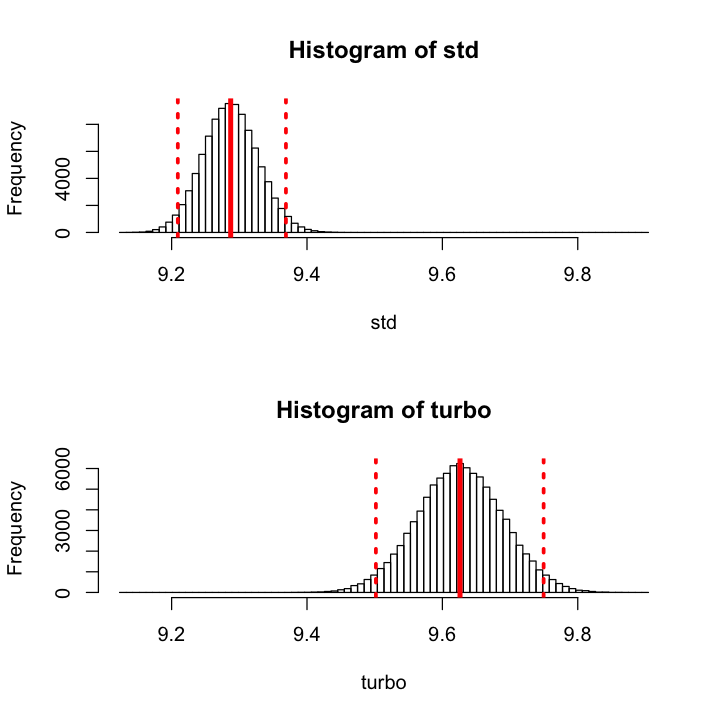

In [25]:
## Bootstrap the mean of the std and of turbo
mean.boot.std = one.boot(autos.std.log.prices, mean, R = 100000)
mean.boot.turbo = one.boot(autos.turbo.log.prices, mean, R = 100000)
plot.t(mean.boot.std$t, mean.boot.turbo$t, cols = c('std', 'turbo'), nbins = 80)

The distribution of the bootstrap means do not overlap. Evidently, the difference is significant.

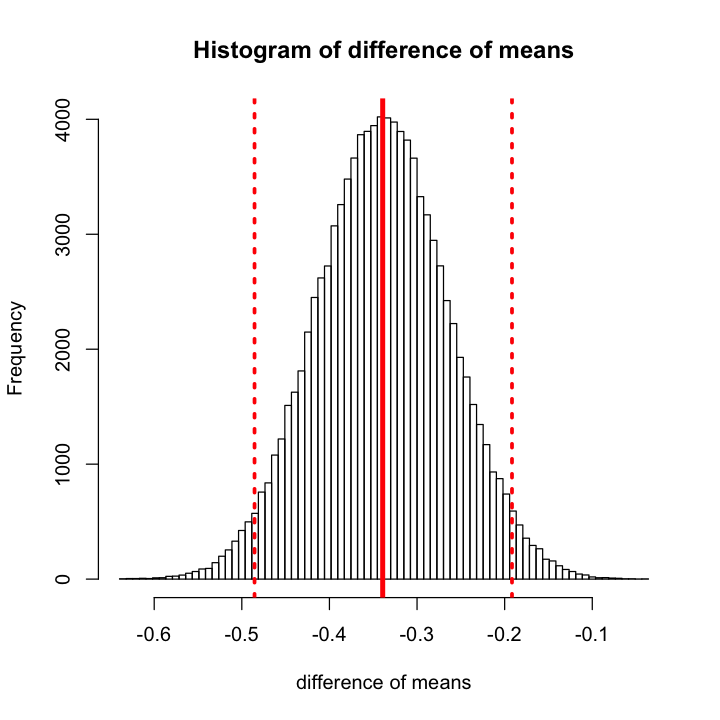

In [29]:
two.boot.mean.aspiration = two.boot(autos.std.log.prices, autos.turbo.log.prices, mean, R = 100000)
plot.diff(two.boot.mean.aspiration$t)

You can graphically confirm that difference of means has a normal distribution by Q-Q plotting. 

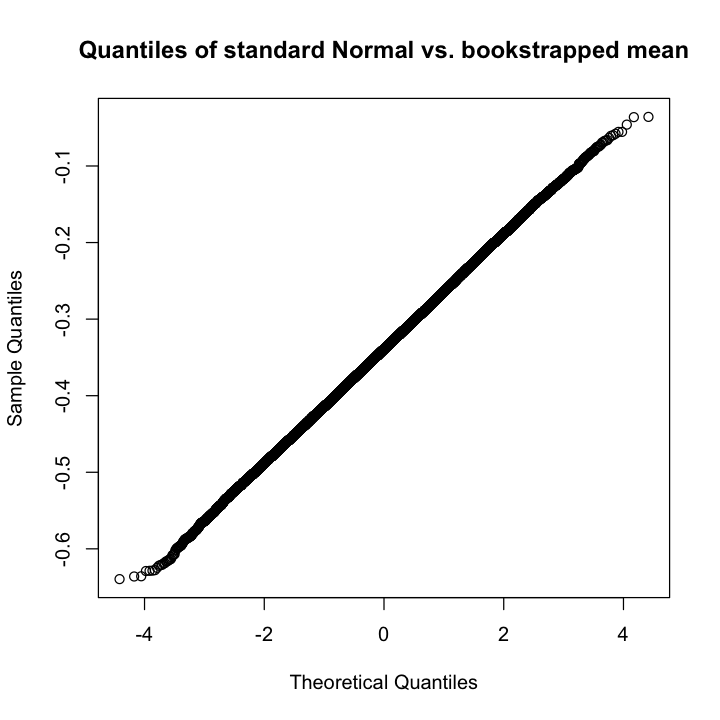

In [30]:
## Is the bootstrapped distribution Normal?
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(two.boot.mean.aspiration$t, main = 'Quantiles of standard Normal vs. bookstrapped mean')

### Comparison with the results of t-test from last week's assignment

* When I ran t-testing on log(Price) grouped by aspiration, I realised that there was a big gap between means and turbo charger had a significant impact on price. 

* Bootstrap sampling conformed to the remarkable difference in distributions of means of std aspiration and turbo. 

## Compare the differences of the bootstrap resampled mean of the log price of the autos grouped by body style 

In [35]:
table(auto.price$body.style)


convertible     hardtop   hatchback       sedan       wagon 
          6           8          63          94          24 

I will eliminate convertible and hardtop since there are just few of them. 

In [38]:
autos.hatchback <- auto.price[auto.price$body.style == 'hatchback',]
autos.sedan <- auto.price[auto.price$body.style == 'sedan',] 
autos.wagon <- auto.price[auto.price$body.style == 'wagon',]
autos.hatchback.log.prices <- log(autos.hatchback$price)
autos.sedan.log.prices <- log(autos.sedan$price)
autos.wagon.log.prices <- log(autos.wagon$price)

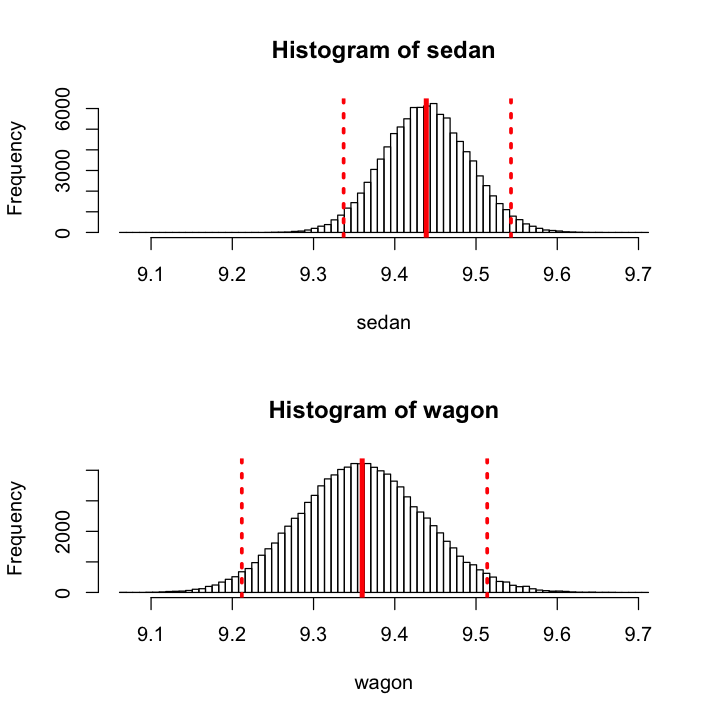

In [41]:
## Bootstrap the mean of the sedan and of wagon
mean.boot.sedan = one.boot(autos.sedan.log.prices, mean, R = 100000)
mean.boot.wagon = one.boot(autos.wagon.log.prices, mean, R = 100000)
plot.t(mean.boot.sedan$t, mean.boot.wagon$t, cols = c('sedan', 'wagon'), nbins = 80)

Histograms of sedan and wagon overlap while that of wagon has a wider spectrum. Means are fairly close. 

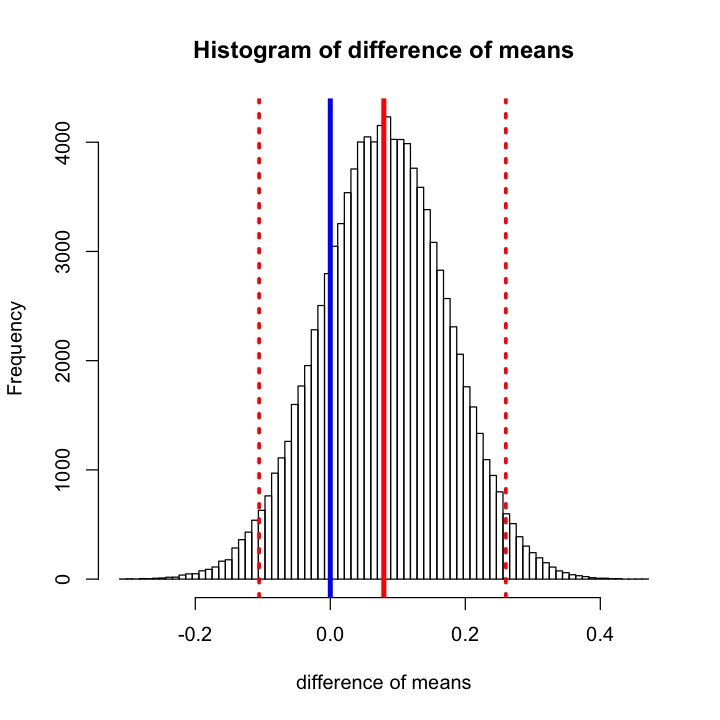

In [42]:
two.boot.mean.body.style = two.boot(autos.sedan.log.prices, autos.wagon.log.prices, mean, R = 100000)
plot.diff(two.boot.mean.body.style$t)

You can see the difference of means is very close to zero. It confroms to findings from ANOVA and Tukey's HSD analysis from the last week's assignment implying that there is not much difference in prices of sedan and wagon autos. 

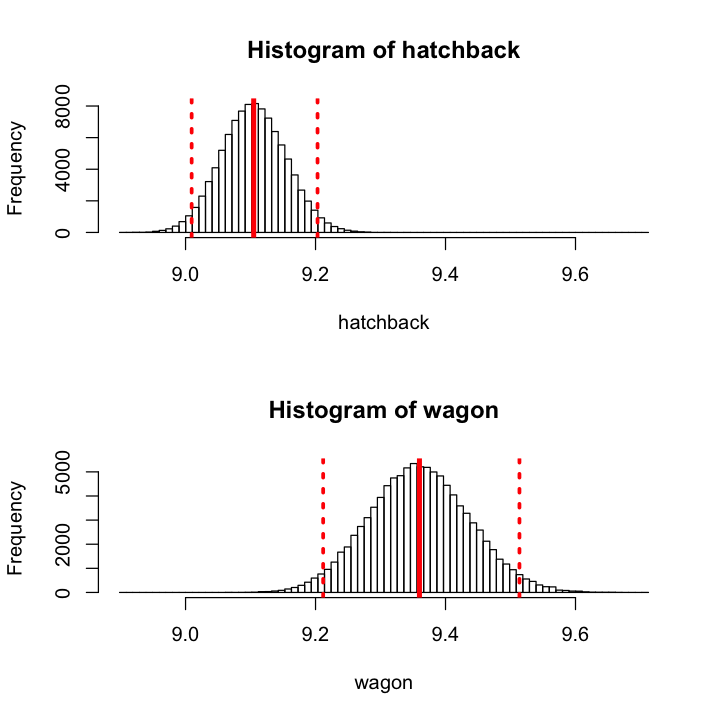

In [44]:
## Bootstrap the mean of the hatchback and of wagon
mean.boot.hatchback = one.boot(autos.hatchback.log.prices, mean, R = 100000)
plot.t(mean.boot.hatchback$t, mean.boot.wagon$t, cols = c('hatchback', 'wagon'), nbins = 80)

Histograms of hatchback and wagon just overlap slightly. There is a significant gap between means. 

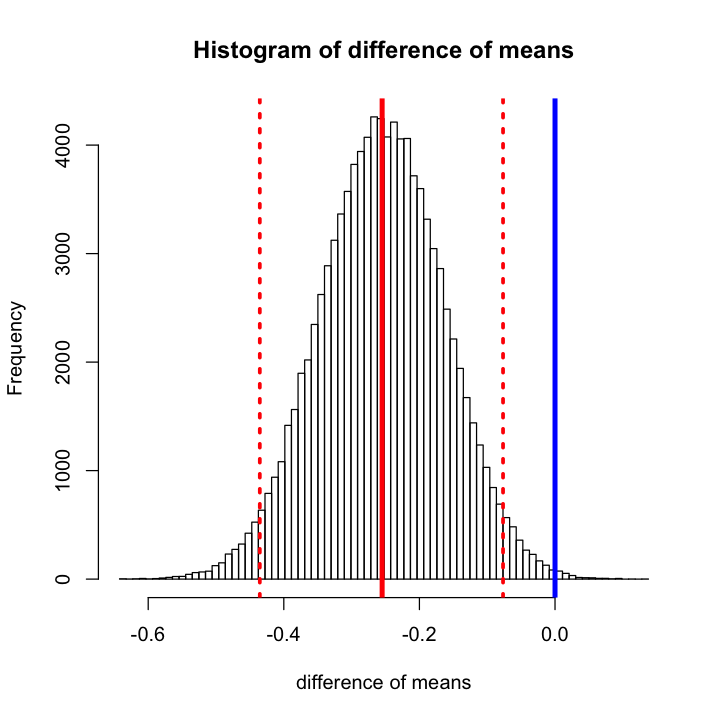

In [45]:
two.boot.mean.body.style2 = two.boot(autos.hatchback.log.prices, autos.wagon.log.prices, mean, R = 100000)
plot.diff(two.boot.mean.body.style2$t)

You can see the zero is out of the 95% confidence interval. It confroms to findings from ANOVA and Tukey's HSD analysis from the last week's assignment implying that there is a remarkable difference in prices of hatchback and wagon autos.